### Explore data

In [36]:
import pandas as pd

pm10 = pd.read_excel("../../data/AirQuality_Krakow/2019_PM10_1g.xlsx")
pm10.head()

,DateTime,MpKrakAlKras,MpKrakBujaka,MpKrakBulwar,MpKrakOsPias,MpKrakSwoszo,MpKrakWadow,MpKrakZloRog
0,2019-01-01 01:00:00,88.2185,139.7900,120.0570,161.0530,NaN,83.6841,77.8355
1,2019-01-01 02:00:00,95.2209,92.5099,63.4217,62.3289,NaN,66.3402,82.9678
2,2019-01-01 03:00:00,85.3689,57.1358,48.6426,56.5202,NaN,55.8833,64.5276
3,2019-01-01 04:00:00,70.8575,39.4615,36.7828,49.5539,NaN,44.1614,46.5672
4,2019-01-01 05:00:00,50.1935,27.1423,28.7538,36.1824,NaN,34.5853,48.1257


### Note about data set air quality

In [4]:
print("Data shape:", pm10.shape)
print(f"Statistic: {pm10.describe()}")
print("\nColumns:", pm10.columns.tolist())
print("\nData types:")
print(pm10.dtypes)
print("\nFirst few timestamps:")
print(pm10['DateTime'].head())
print("\nDate range:")
print(f"From: {pm10['DateTime'].min()}")
print(f"To: {pm10['DateTime'].max()}")

Data shape: (8760, 8)
Statistic:                   DateTime  MpKrakAlKras  MpKrakBujaka  MpKrakBulwar  \
count                 8760   8730.000000   8655.000000   8712.000000   
mean   2019-07-02 12:30:00     49.453956     34.761797     32.751912   
min    2019-01-01 01:00:00      3.446220      3.000000      3.000000   
25%    2019-04-02 06:45:00     26.605000     16.841850     16.027325   
50%    2019-07-02 12:30:00     39.768750     25.826100     24.614750   
75%    2019-10-01 18:15:00     62.136950     41.876350     41.524600   
max    2020-01-01 00:00:00    251.398000    222.938000    349.811000   
std                    NaN     33.578147     28.920883     25.066072   

       MpKrakOsPias  MpKrakSwoszo  MpKrakWadow  MpKrakZloRog  
count   8606.000000   8384.000000  8691.000000   8482.000000  
mean      31.020584     30.735291    28.883373     34.862077  
min        3.000000      3.000000     2.997050      3.000000  
25%       15.792450     15.289300    14.253700     17.422300  
50%

### Explore Station data


In [5]:

stations_df = pd.read_excel("../../data/AirQuality_Krakow/Stations.xlsx")
print("Station information:")
print(f"Number of stations: {len(stations_df)}")
print("\nStation columns:", stations_df.columns.tolist())
print("\nStation details:")
stations_df

Station information:
Number of stations: 7

Station columns: ['Station Code', 'International Code', 'Street address', 'Area Type', 'Station Category', 'WGS84 φ N', 'WGS84 λ E']

Station details:


,Station Code,International Code,Street address,Area Type,Station Category,WGS84 φ N,WGS84 λ E
0,MpKrakAlKras,PL0012A,"Kraków, Aleja Krasińskiego",urban,stationary container unit,50.057678,19.926189
1,MpKrakBujaka,PL0501A,"Kraków, ul. Bujaka",urban,stationary container unit,50.010575,19.949189
2,MpKrakBulwar,PL0039A,"Kraków, ul. Bulwarowa",urban,stationary container unit,50.069308,20.053492
3,MpKrakOsPias,PL0642A,"Kraków, os. Piastów",urban,free-standing dust sampler,50.098508,20.018269
4,MpKrakSwoszo,PL0735A,"Kraków, os. Swoszowice",urban,free-standing dust sampler,49.991442,19.936792
5,MpKrakWadow,PL0670A,"Kraków, os. Wadów",urban,stationary container unit,50.100569,20.122561
6,MpKrakZloRog,PL0643A,"Kraków, ul. Złoty Róg",urban,free-standing dust sampler,50.081197,19.895358


### Explore Weather data

In [37]:
weather_df = pd.read_csv("../../data/Weather_Krakow/2020.csv")
weather_df.head()
# weather_df.columns
# print(f"Basis statistic: {weather_df.describe()}")
print(f"colums: {weather_df.columns}")

colums: Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AJ1', 'AY1', 'AY2', 'AZ1',
       'AZ2', 'GA1', 'GA2', 'GA3', 'GE1', 'GF1', 'IA1', 'IA2', 'KA1', 'KA2',
       'MA1', 'MD1', 'MW1', 'MW2', 'OC1', 'OD1', 'OD2', 'OD3', 'REM', 'EQD'],
      dtype='object')


C:\Users\PC\AppData\Local\Temp\ipykernel_11188\3396967097.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_df = pd.read_csv("../../data/Weather_Krakow/2020.csv")


# Preprocess data

1. Load the data
2. Data quaility check
3. Data cleaning and preprocessing
4. Save the process data

## Preprocess Weather data
1. Fill missing dates 
2. Fill missing values
3. Creates additionals features
4. Crate dummy features

In [38]:
from pathlib import Path


def load_all_weather_data():
    weather_dir = Path("../../data/Weather_Krakow")
    weather_files = ["2019.csv", "2020.csv", "2021.csv", "2022.csv", "2023.csv"]
    
    all_weather = []
    
    for file in weather_files:
        file_path = weather_dir / file
        if file_path.exists():
            print(f"Loading weather {file}...")
            df = pd.read_csv(file_path, low_memory=False)
            df['DATE'] = pd.to_datetime(df['DATE'])
            all_weather.append(df)
        else:
            print(f"{file} not found")
    
    if all_weather:
        combined_df = pd.concat(all_weather, ignore_index=True)
        combined_df = combined_df.sort_values('DATE').reset_index(drop=True)
        print(f"Combined weather data: {len(combined_df)} records")
        return combined_df
    else:
        return None


weather_all_data = load_all_weather_data()


Loading weather 2019.csv...
Loading weather 2020.csv...
Loading weather 2021.csv...
Loading weather 2022.csv...
Loading weather 2023.csv...
Combined weather data: 130328 records


In [39]:
weather_all_data['STATION'].duplicated().sum()
# len(weather_all_data)

130327

In [40]:
# Fill missing date
# builds complete hourly time series data from start to end weather data 
# ensure to get consistentcy hourly weather entries 
weather_df = pd.DataFrame()
weather_df['DATE'] = pd.date_range(
    start=weather_all_data.iloc[0]['DATE'], 
    end=weather_all_data.iloc[-1]['DATE'], 
    freq='H'
)
weather_df = pd.merge(weather_df, weather_all_data.iloc[:, 1:], on=['DATE'], how='left')
weather_df.head()



C:\Users\PC\AppData\Local\Temp\ipykernel_11188\2466914696.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_df['DATE'] = pd.date_range(


,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,WND,...,MW1,MW2,MW3,OC1,OD1,OD2,OD3,REM,EQD,IA2
0,2019-01-01 00:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999.0,V020,"240,1,N,0030,1",...,"10,1",NaN,NaN,NaN,NaN,NaN,NaN,SYN08212566 11556 82403 10001 21009 39996 4030...,NaN,NaN
1,2019-01-01 00:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-15,99999.0,V020,"240,1,N,0026,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET060METAR EPKK 010000Z 24005KT 6000 FEW021 B...,NaN,NaN
2,2019-01-01 01:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999.0,V020,"220,1,N,0030,1",...,"10,1",NaN,NaN,NaN,NaN,NaN,NaN,SYN08612566 41556 82203 10008 21008 39994 4029...,NaN,NaN
3,2019-01-01 01:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-15,99999.0,V020,"220,1,N,0031,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET052METAR EPKK 010100Z 22006KT 6000 BKN020 0...,NaN,NaN
4,2019-01-01 02:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999.0,V020,"210,1,N,0040,1",...,"10,1",NaN,NaN,NaN,NaN,NaN,NaN,SYN08012566 41556 52104 10008 21010 39981 4028...,NaN,NaN


In [41]:
weather_all_data['STATION'].duplicated().sum

<bound method Series.sum of 0         False
1          True
2          True
3          True
4          True
          ...  
130323     True
130324     True
130325     True
130326     True
130327     True
Name: STATION, Length: 130328, dtype: bool>

In [53]:
import numpy as np

weather_df.replace(
    to_replace=[99999.0, 99999.9, 999.9, 9999, 99999, -9999, -9999.9, +9999, +99999, "+99999", "99999,9"],
    value=np.nan,
    inplace=True
)
weather_df.head()


,date,source,elevation,name,report_type,call_sign,quality_control,wnd,cig,vis,...,od1,od2,od3,rem,eqd,ia2,year,dayofyear,hour,week
0,2019-01-01 00:00:00,4.0,241.09,"BALICE, PL",FM-12,NaN,V020,"240,1,N,0030,1","99999,9,9,N","006000,1,9,9",...,"3,99,0120,1,999","5,99,0090,1,999","5,99,0100,1,999",SYN08212566 11556 82403 10001 21009 39996 4030...,Q01 003SCCGA1,NaN,0,0,0,1
1,2019-01-01 00:00:00,4.0,241.09,"BALICE, PL",FM-15,NaN,V020,"240,1,N,0026,1","00884,1,9,N","006000,1,9,9",...,"3,99,0120,1,999","5,99,0090,1,999","5,99,0100,1,999",MET060METAR EPKK 010000Z 24005KT 6000 FEW021 B...,Q01 003SCCGA1,NaN,0,0,0,1
2,2019-01-01 01:00:00,4.0,241.09,"BALICE, PL",FM-12,NaN,V020,"220,1,N,0030,1","99999,9,9,N","006000,1,9,9",...,"5,99,0020,1,999","5,99,0070,1,999",NaN,SYN08612566 41556 82203 10008 21008 39994 4029...,Q01 003SCCGA1,NaN,0,0,1,1
3,2019-01-01 01:00:00,4.0,241.09,"BALICE, PL",FM-15,NaN,V020,"220,1,N,0031,1","00610,1,C,N","006000,1,9,9",...,"5,99,0020,1,999","5,99,0070,1,999",NaN,MET052METAR EPKK 010100Z 22006KT 6000 BKN020 0...,Q01 003SCCGA1,NaN,0,0,1,1
4,2019-01-01 02:00:00,4.0,241.09,"BALICE, PL",FM-12,NaN,V020,"210,1,N,0040,1","99999,9,9,N","006000,1,9,9",...,"5,99,0060,1,999","5,99,0110,1,999",NaN,SYN08012566 41556 52104 10008 21010 39981 4028...,Q01 003SCCGA1,NaN,0,0,2,1


In [54]:
# Change all of the columns to lowercase 
weather_df.columns = weather_df.columns.str.lower()
print(weather_df.dtypes)


date               datetime64[ns]
source                    float64
elevation                 float64
name                       object
report_type                object
call_sign                 float64
quality_control            object
wnd                        object
cig                        object
vis                        object
tmp                        object
dew                        object
slp                        object
aa1                        object
aa2                        object
aj1                        object
ay1                        object
ay2                        object
az1                        object
az2                        object
ed1                        object
ga1                        object
ga2                        object
ga3                        object
ge1                        object
gf1                        object
ia1                        object
ka1                        object
ka2                        object
ma1           

In [55]:
from sklearn import preprocessing

weather_df['date'] = pd.to_datetime(weather_df['date'])


weather_df['year'] = weather_df['date'].dt.year
weather_df['dayofyear'] = weather_df['date'].dt.dayofyear
weather_df['hour'] = weather_df['date'].dt.hour
weather_df['week'] = weather_df['date'].dt.isocalendar().week



for col in ['year', 'dayofyear', 'hour']:
    weather_df[col] = weather_df[col].fillna(method="ffill").fillna(method="bfill")
    le = preprocessing.LabelEncoder()
    weather_df[col] = le.fit_transform(weather_df[col])

# year, day of year and hour is lable encoder 

C:\Users\PC\AppData\Local\Temp\ipykernel_11188\4070561917.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df[col] = weather_df[col].fillna(method="ffill").fillna(method="bfill")
C:\Users\PC\AppData\Local\Temp\ipykernel_11188\4070561917.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df[col] = weather_df[col].fillna(method="ffill").fillna(method="bfill")
C:\Users\PC\AppData\Local\Temp\ipykernel_11188\4070561917.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df[col] = weather_df[col].fillna(method="ffill").fillna(method="bfill")


In [56]:
cat_feat = [
    'name',
    'report_type',
    'quality_control',
    'wnd',
    'cig',
    'vis',
    'tmp',
    'dew',
    'slp',
    'aa1', 'aa2',
    'aj1',
    'ay1', 'ay2',
    'az1', 'az2',
    'ed1',
    'ga1', 'ga2', 'ga3',
    'ge1',
    'gf1',
    'ia1', 'ia2',
    'ka1', 'ka2',
    'ma1',
    'md1',
    'mw1', 'mw2', 'mw3',
    'oc1',
    'od1', 'od2', 'od3',
    'rem',
    'eqd'
]


In [57]:
for col in cat_feat:
    if weather_df[col].isnull().sum() > 0:
        weather_df[col] = weather_df.groupby(['week', 'hour'])[col] \
            .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))


C:\Users\PC\AppData\Local\Temp\ipykernel_11188\3082730837.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))


In [ ]:
weather_df.drop(columns=['latitude', 'longitude'], inplace=True)
weather_df.dropna
weather_df.head()

KeyError: "['latitude', 'longitude'] not found in axis"

In [59]:
cont_vars = weather_df.select_dtypes(include=[np.number]).columns.tolist()

for col in cont_vars:
    if weather_df[col].isnull().sum(axis=0) > 0:
        weather_df[col] = weather_df.groupby(['year', 'week', 'hour'])[col].transform(lambda x: x.fillna(x.mean()))
        weather_df[col] = weather_df.groupby (['dayofyear', 'hour'])[col].transform(lambda x: x.fillna(x.mean()))
        weather_df[col] = weather_df[col].fillna(weather_df[col].rolling(4, min_periods=1).mean())

In [60]:
weather_df = weather_df.dropna(axis=1, how="any") 

In [61]:
def additional_features(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['dayofweek'] = df['date'].dt.dayofweek
    df['hour'] = df['date'].dt.hour
    df['day'] = df['date'].dt.day
    df['dayofyear'] = df['date'].dt.dayofyear
    df['week'] = df['date'].dt.isocalendar().week

    df['month_dummy'] = 0
    df.loc[df['month'] > 10, 'month_dummy'] = 1
    df.loc[df['month'] < 3, 'month_dummy'] = 1

    df['hour_dummy'] = 0
    df.loc[(df['month_dummy'] == 1) & (df['hour'] > 19) & (df['hour'] < 23), 'hour_dummy'] = 1
    df.loc[(df['month_dummy'] == 1) & (df['hour'] > 5) & (df['hour'] < 9), 'hour_dummy'] = 1

    df['day_dummy'] = 0
    df.loc[(df['hour'] > 9) & (df['hour'] < 19), 'day_dummy'] = 1

    return df

weather_df = additional_features(weather_df)




C:\Users\PC\AppData\Local\Temp\ipykernel_11188\1106400626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
C:\Users\PC\AppData\Local\Temp\ipykernel_11188\1106400626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
C:\Users\PC\AppData\Local\Temp\ipykernel_11188\1106400626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [62]:
weather_df.columns

Index(['date', 'source', 'elevation', 'name', 'report_type', 'quality_control',
       'wnd', 'cig', 'vis', 'tmp', 'dew', 'slp', 'ga1', 'ga2', 'ge1', 'gf1',
       'ma1', 'md1', 'rem', 'year', 'dayofyear', 'hour', 'week', 'month',
       'dayofweek', 'day', 'month_dummy', 'hour_dummy', 'day_dummy'],
      dtype='object')

### Preprocess Air Quality data

In [63]:
def load_all_pm10_data():
    data_dir = Path("../../data/AirQuality_Krakow")
    pm10_files = [
        "2019_PM10_1g.xlsx",
        "2020_PM10_1g.xlsx", 
        "2021_PM10_1g.xlsx",
        "2022_PM10_1g.xlsx",
        "2023_PM10_1g.xlsx"
    ]
    
    all_data = []
    
    for file in pm10_files:
        file_path = data_dir / file
        if file_path.exists():
            print(f"Loading {file}...")
            df = pd.read_excel(file_path)
            df['DateTime'] = pd.to_datetime(df['DateTime'])
            all_data.append(df)
         
        else:
            print(f"Warning: {file} not found")
    
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        combined_df = combined_df.sort_values('DateTime').reset_index(drop=True)
        return combined_df
    else:
        return None

pm10_all_years = load_all_pm10_data()

Loading 2019_PM10_1g.xlsx...
Loading 2020_PM10_1g.xlsx...
Loading 2021_PM10_1g.xlsx...
Loading 2022_PM10_1g.xlsx...
Loading 2023_PM10_1g.xlsx...


In [22]:
pm10.head()
pm10.describe()
print(pm10.isna().sum())
print(len(pm10))

DateTime          0
MpKrakAlKras     30
MpKrakBujaka    105
MpKrakBulwar     48
MpKrakOsPias    154
MpKrakSwoszo    376
MpKrakWadow      69
MpKrakZloRog    278
dtype: int64
8760


In [23]:
# fill na của pm10 bằng cách nội suy tuyến tính, set date, time làm index 
pm10_all_years = pm10_all_years.set_index('DateTime')
pm10_all_years = pm10_all_years.interpolate(method='time')
pm10_all_years = pm10_all_years.reset_index()

In [24]:
# pm10 = pm10[(pm10['DateTime'] >= start) & (pm10['DateTime'] <= end)]
# weather_all_data = weather_all_data[(weather_all_data['DATE'] >= start) & (weather['DATE'] <= end)]


In [25]:
# drop MpKrakSwoszo columns in pm10_all_years
pm10_all_years = pm10_all_years.drop(columns=["MpKrakSwoszo"])



In [26]:
pm10_all_years.head()

,DateTime,MpKrakAlKras,MpKrakBujaka,MpKrakBulwar,MpKrakOsPias,MpKrakWadow,MpKrakZloRog
0,2019-01-01 01:00:00,88.2185,139.7900,120.0570,161.0530,83.6841,77.8355
1,2019-01-01 02:00:00,95.2209,92.5099,63.4217,62.3289,66.3402,82.9678
2,2019-01-01 03:00:00,85.3689,57.1358,48.6426,56.5202,55.8833,64.5276
3,2019-01-01 04:00:00,70.8575,39.4615,36.7828,49.5539,44.1614,46.5672
4,2019-01-01 05:00:00,50.1935,27.1423,28.7538,36.1824,34.5853,48.1257


### Detect outliers
detect outliers in PM10 data using boxplot

```python

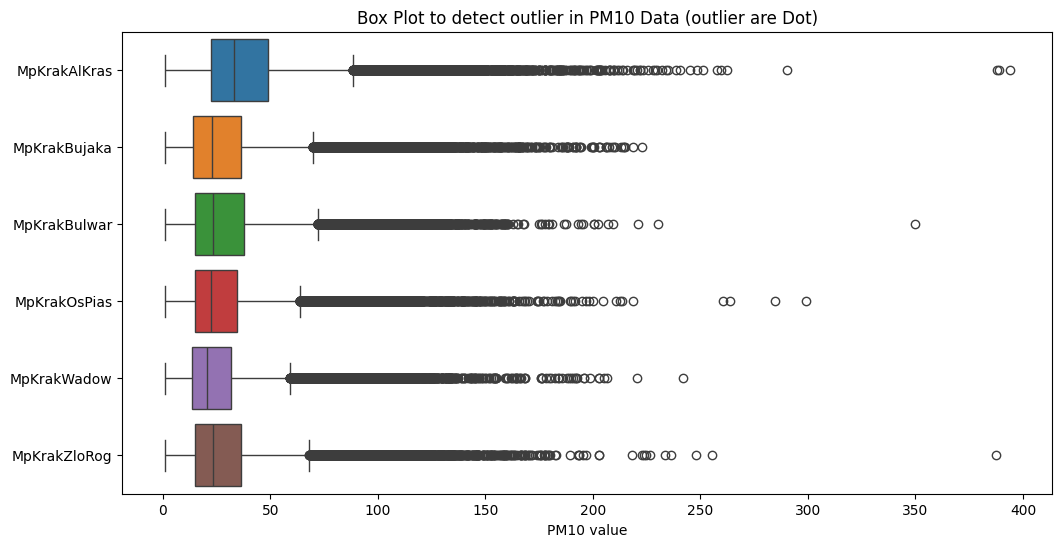

MpKrakAlKras: 2456 outliers (5.60%)
MpKrakBujaka: 3039 outliers (6.93%)
MpKrakBulwar: 2786 outliers (6.36%)
MpKrakOsPias: 3030 outliers (6.91%)
MpKrakWadow: 3045 outliers (6.95%)
MpKrakZloRog: 2950 outliers (6.73%)


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

station_cols = ['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakOsPias', 
                'MpKrakWadow', 'MpKrakZloRog']  


plt.figure(figsize=(12, 6))
sns.boxplot(data=pm10_all_years[station_cols], orient="h")
plt.title("Box Plot to detect outlier in PM10 Data (outlier are Dot)")
plt.xlabel("PM10 value")
plt.show()

for col in station_cols:
    Q1 = pm10_all_years[col].quantile(0.25)
    Q3 = pm10_all_years[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = pm10_all_years[(pm10_all_years[col] < lower) | (pm10_all_years[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers ({100*len(outliers)/len(pm10_all_years):.2f}%)")

### Remove outliers
after detecting outliers, we not remove from this dataset since it is time series data so it just replace using interpolation method
```python

In [64]:
import numpy as np
def replace_outliers_iqr_interpolate(df, cols):
    clean_df = df.copy()
    for col in cols:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        clean_df[col] = clean_df[col].mask(
            (clean_df[col] < lower_bound) | (clean_df[col] > upper_bound),np.nan)

        clean_df[col] = clean_df[col].interpolate(method='linear', limit_direction='both')
    
    return clean_df

pm10_cols = ['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar',
             'MpKrakOsPias', 'MpKrakWadow', 'MpKrakZloRog']

pm10_all_years_clean = replace_outliers_iqr_interpolate(pm10_all_years, pm10_cols)




### After oulier removal

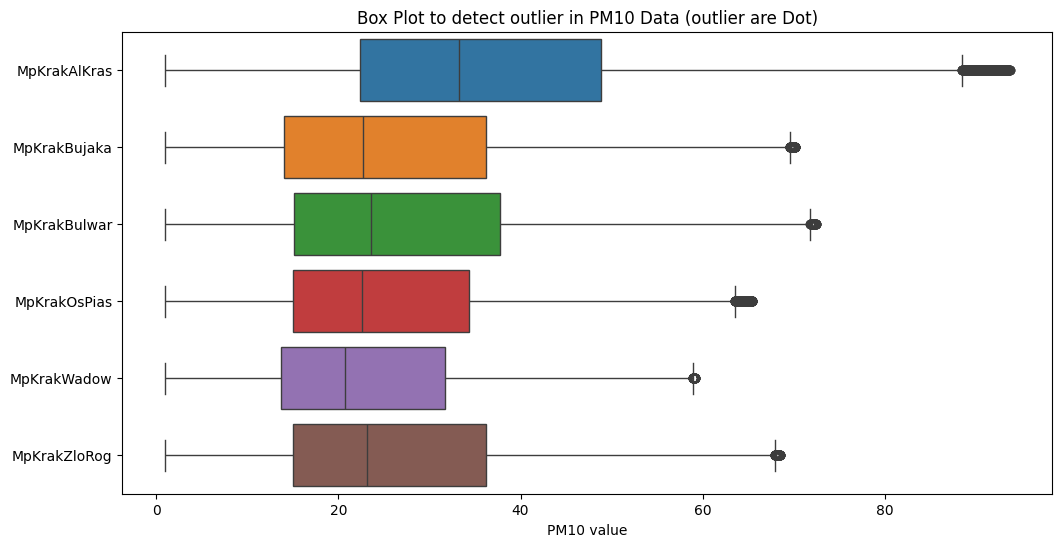

MpKrakAlKras: 924 outliers (2.11%)
MpKrakBujaka: 118 outliers (0.27%)
MpKrakBulwar: 143 outliers (0.33%)
MpKrakOsPias: 412 outliers (0.94%)
MpKrakWadow: 42 outliers (0.10%)
MpKrakZloRog: 94 outliers (0.21%)


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

station_cols = ['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakOsPias', 
                'MpKrakWadow', 'MpKrakZloRog']  


plt.figure(figsize=(12, 6))
sns.boxplot(data=pm10_all_years_clean[station_cols], orient="h")
plt.title("Box Plot to detect outlier in PM10 Data (outlier are Dot)")
plt.xlabel("PM10 value")
plt.show()

for col in station_cols:
    Q1 = pm10_all_years_clean[col].quantile(0.25)
    Q3 = pm10_all_years_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = pm10_all_years_clean[(pm10_all_years_clean[col] < lower) | (pm10_all_years_clean[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers ({100*len(outliers)/len(pm10_all_years):.2f}%)")

### Merge data


In [ ]:


if 'date' in weather_df.columns:
    weather_df = weather_df.rename(columns={'date': 'DateTime'})
elif 'DateTime' not in weather_df.columns:
    print("ERROR: No date column found in weather_df")

# if 'latitude' in weather_df.columns:
#     weather_df = weather_df.drop(['latitude', 'longitude'], axis=1)


pm10_all_years_clean['DateTime'] = pd.to_datetime(pm10_all_years_clean['DateTime'])
weather_df['DateTime'] = pd.to_datetime(weather_df['DateTime'])

print("After cleanup - Weather columns:", weather_df.columns.tolist())


merged_data = pd.merge(pm10_all_years_clean, weather_df, on='DateTime', how='inner')
print(f"Merged data shape: {merged_data.shape}")
print("Merged columns:", merged_data.columns.tolist()[:10])


pm10_cols = ['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakOsPias', 'MpKrakWadow', 'MpKrakZloRog']


id_vars_raw = ['DateTime'] + [col for col in merged_data.columns if col not in pm10_cols]
id_vars = list(dict.fromkeys(id_vars_raw))  

print(f"ID vars (first 5): {id_vars[:5]}")
print(f"Total ID vars: {len(id_vars)}")

final_data = merged_data.melt(
    id_vars=id_vars,
    value_vars=pm10_cols,
    var_name='station_code',
    value_name='pm10'
)

station_mapping = {
    'MpKrakAlKras': 'AlKras',
    'MpKrakBujaka': 'Bujaka', 
    'MpKrakBulwar': 'Bulwar',
    'MpKrakOsPias': 'OsPias',
    'MpKrakWadow': 'Wadow',
    'MpKrakZloRog': 'ZloRog'
}

final_data['station_code'] = final_data['station_code'].map(station_mapping)

station_coordinates = {
    'AlKras': {'latitude': 50.0647, 'longitude': 19.9450},
    'Bujaka': {'latitude': 50.0101, 'longitude': 19.9493},
    'Bulwar': {'latitude': 50.0695, 'longitude': 19.9063},
    'OsPias': {'latitude': 50.0920, 'longitude': 19.9559},
    'Wadow': {'latitude': 50.0570, 'longitude': 19.8869},
    'ZloRog': {'latitude': 50.0305, 'longitude': 20.0163}
}

final_data['latitude'] = final_data['station_code'].map(lambda x: station_coordinates.get(x, {}).get('latitude'))
final_data['longitude'] = final_data['station_code'].map(lambda x: station_coordinates.get(x, {}).get('longitude'))

final_data = final_data.dropna(subset=['pm10', 'latitude', 'longitude'])
final_data = final_data.sort_values(['station_code', 'DateTime']).reset_index(drop=True)


After cleanup - Weather columns: ['DateTime', 'source', 'elevation', 'name', 'report_type', 'call_sign', 'quality_control', 'wnd', 'cig', 'vis', 'tmp', 'dew', 'slp', 'aa1', 'aa2', 'aj1', 'ay1', 'ay2', 'az1', 'az2', 'ed1', 'ga1', 'ga2', 'ga3', 'ge1', 'gf1', 'ia1', 'ka1', 'ka2', 'ma1', 'md1', 'mw1', 'mw2', 'mw3', 'oc1', 'od1', 'od2', 'od3', 'rem', 'eqd', 'ia2', 'year', 'dayofyear', 'hour', 'week', 'month', 'dayofweek', 'day', 'month_dummy', 'hour_dummy', 'day_dummy']
Merged data shape: (75719, 57)
Merged columns: ['DateTime', 'MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakOsPias', 'MpKrakWadow', 'MpKrakZloRog', 'source', 'elevation', 'name']
ID vars (first 5): ['DateTime', 'source', 'elevation', 'name', 'report_type']
Total ID vars: 51


In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

final_data.corr(numeric_only=True)


,source,elevation,call_sign,year,dayofyear,hour,week,month,dayofweek,day,...,mw1_encoded,mw2_encoded,mw3_encoded,oc1_encoded,od1_encoded,od2_encoded,od3_encoded,rem_encoded,eqd_encoded,ia2_encoded
source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elevation,NaN,1.000000,NaN,2.774962e-02,5.351199e-03,1.353184e-02,5.137575e-03,6.637724e-03,-9.375629e-03,-1.533220e-02,...,-9.240050e-04,2.926361e-04,5.057667e-03,-7.193916e-03,3.555847e-03,-3.272720e-03,-2.686326e-03,-4.117788e-02,2.888254e-03,3.860190e-03
call_sign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,0.027750,NaN,1.000000e+00,3.440590e-03,7.115248e-03,5.399751e-03,3.666068e-03,3.465379e-03,3.526614e-03,...,2.626028e-02,-1.795777e-04,4.450125e-03,6.251564e-03,2.463567e-02,6.894474e-03,1.437326e-03,4.091226e-04,-2.814298e-03,9.424874e-03
dayofyear,NaN,0.005351,NaN,3.440590e-03,1.000000e+00,-8.910320e-04,9.698679e-01,9.965142e-01,2.300562e-03,1.013603e-01,...,-3.093265e-02,-6.486304e-02,1.542626e-01,1.131488e-01,1.996833e-01,1.337166e-01,1.708250e-01,-1.688006e-02,1.465246e-02,-2.883998e-02
hour,NaN,0.013532,NaN,7.115248e-03,-8.910320e-04,1.000000e+00,-1.110808e-03,-8.294968e-04,1.166259e-03,2.014400e-04,...,1.561042e-01,1.441111e-01,-1.259452e-02,-4.069771e-03,3.330373e-03,-5.036397e-02,-5.911294e-02,-1.585885e-02,-4.106359e-02,7.833926e-02
week,NaN,0.005138,NaN,5.399751e-03,9.698679e-01,-1.110808e-03,1.000000e+00,9.684990e-01,4.199393e-03,7.291742e-02,...,-3.402388e-02,-6.175329e-02,1.551281e-01,1.138326e-01,2.059703e-01,1.371205e-01,1.752581e-01,-1.518456e-02,2.618954e-02,-3.115933e-02
month,NaN,0.006638,NaN,3.666068e-03,9.965142e-01,-8.294968e-04,9.684990e-01,1.000000e+00,2.441600e-03,1.828714e-02,...,-2.623271e-02,-6.223868e-02,1.545392e-01,1.153735e-01,2.026173e-01,1.371226e-01,1.714932e-01,-1.969483e-02,1.441860e-02,-2.861090e-02
dayofweek,NaN,-0.009376,NaN,3.465379e-03,2.300562e-03,1.166259e-03,4.199393e-03,2.441600e-03,1.000000e+00,-1.517244e-03,...,-1.603817e-03,9.790532e-04,4.446304e-03,5.945086e-04,7.031999e-04,1.372791e-03,9.098695e-04,-4.817937e-03,3.038935e-03,1.441413e-04
day,NaN,-0.015332,NaN,3.526614e-03,1.013603e-01,2.014400e-04,7.291742e-02,1.828714e-02,-1.517244e-03,1.000000e+00,...,-4.258233e-02,-1.254242e-02,1.698077e-02,-1.816348e-02,-1.407556e-02,-2.916559e-02,2.975261e-04,2.823984e-02,-1.803062e-03,-4.359517e-03


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df = pd.read_csv('final_pm10_dataset.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.sort_values(['station_code', 'DateTime'], inplace=True)

df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour
df['dayofweek'] = df['DateTime'].dt.dayofweek
df['dayofyear'] = df['DateTime'].dt.dayofyear


le_station = LabelEncoder()
df['station_encoded'] = le_station.fit_transform(df['station_code'])


feature_cols = [
    'latitude', 'longitude', 'station_encoded',
    'year', 'month', 'day', 'hour', 'dayofweek', 'dayofyear'
]
weather_features = [col for col in df.select_dtypes(include=np.number).columns 
                    if col not in ['pm10'] + feature_cols]
feature_cols += weather_features
feature_cols = list(set(feature_cols))  

df = df[feature_cols + ['pm10']].copy()
df = df.fillna(df.median())


scaler = StandardScaler()
scaled = scaler.fit_transform(df[feature_cols])
df_scaled = pd.DataFrame(scaled, columns=feature_cols)
df_scaled['pm10'] = df['pm10'].values


def create_sequences(data, seq_len=24):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data.iloc[i:i+seq_len][feature_cols].values)
        y.append(data.iloc[i+seq_len]['pm10'])
    return np.array(X), np.array(y)

X, y = create_sequences(df_scaled)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = Sequential([
    LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=64, 
                    validation_split=0.2,
                    verbose=1)


y_pred = model.predict(X_test).flatten()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

plt.figure(figsize=(14, 5))
plt.plot(y_test[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.legend()
plt.title('PM10 Prediction (first 200 samples)')
plt.show()


KeyboardInterrupt: 

<function mean_squared_error at 0x00000132FC1B0CC0>


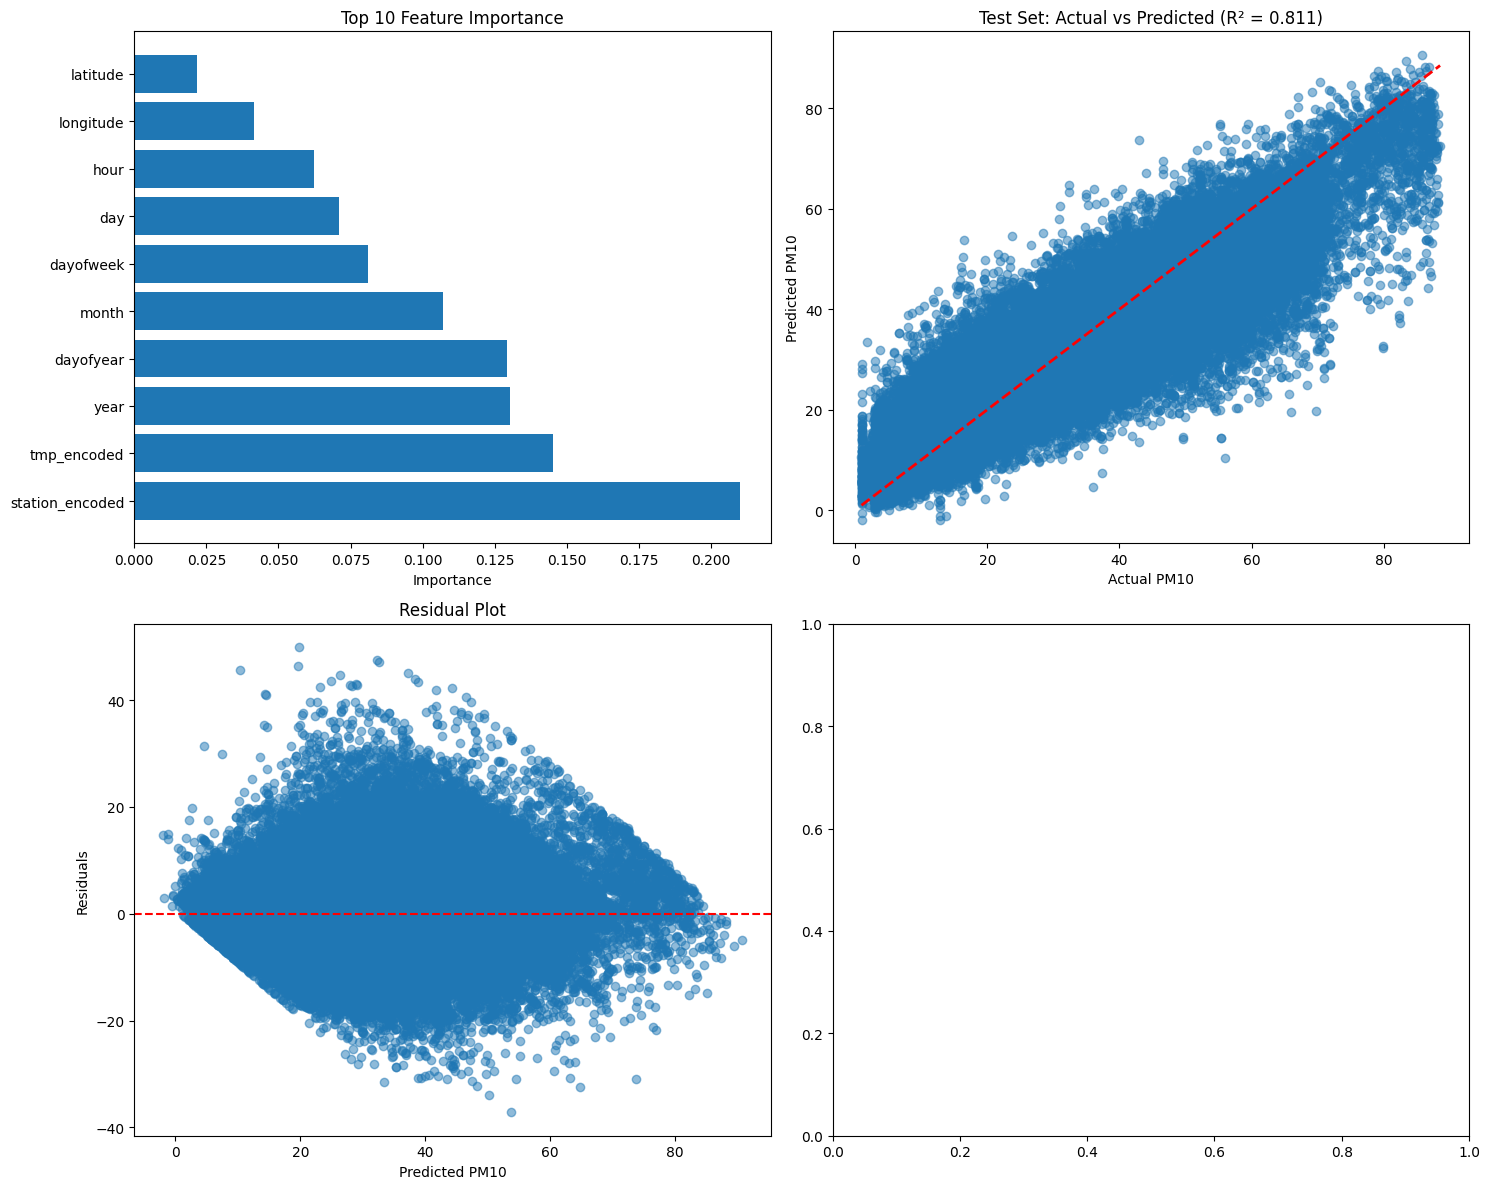

Mean Absolute Error (MAE): 5.54
 R square: 0.77
Features used for XGBoost model:
 ['latitude', 'longitude', 'station_encoded', 'year', 'month', 'day', 'hour', 'dayofweek', 'dayofyear', 'tmp_encoded']


C:\Users\PC\AppData\Local\Temp\ipykernel_11188\2576558552.py:136: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  station_perf_df = test_results.groupby('station').apply(


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import joblib

final_data = pd.read_csv('final_pm10_dataset.csv')
final_data['DateTime'] = pd.to_datetime(final_data['DateTime'])

final_data['year'] = final_data['DateTime'].dt.year
final_data['month'] = final_data['DateTime'].dt.month
final_data['day'] = final_data['DateTime'].dt.day
final_data['hour'] = final_data['DateTime'].dt.hour
final_data['dayofweek'] = final_data['DateTime'].dt.dayofweek
final_data['dayofyear'] = final_data['DateTime'].dt.dayofyear

le_station = LabelEncoder()
final_data['station_encoded'] = le_station.fit_transform(final_data['station_code'])

# categorical_cols = []
# for col in final_data.columns:
#     if final_data[col].dtype == 'object' and col not in ['DateTime', 'station_code']:
#         categorical_cols.append(col)
#         le = LabelEncoder()
#         final_data[f'{col}_encoded'] = le.fit_transform(final_data[col].astype(str))
# Explicitly encode only 'wind' and 'tmp' if they exist and are object types
encode_cols = ['wind', 'tmp']

for col in encode_cols:
    if col in final_data.columns and final_data[col].dtype == 'object':
        le = LabelEncoder()
        final_data[f'{col}_encoded'] = le.fit_transform(final_data[col].astype(str))


feature_cols = [
    'latitude', 'longitude', 'station_encoded',
    'year', 'month', 'day', 'hour', 'dayofweek', 'dayofyear',
]

numeric_cols = final_data.select_dtypes(include=[np.number]).columns.tolist()
# weather_features = [col for col in numeric_cols if col not in 
#                    ['pm10', 'latitude', 'longitude', 'station_encoded', 
#                     'year', 'month', 'day', 'hour', 'dayofweek', 'dayofyear']]
# feature_cols.extend(weather_features)
# feature_cols = list(set(feature_cols))
# feature_cols = [col for col in feature_cols if col in final_data.columns]
encoded_cols = [f'{col}_encoded' for col in encode_cols if f'{col}_encoded' in final_data.columns]
feature_cols += encoded_cols

X = final_data[feature_cols].copy()
y = final_data['pm10'].copy()
# X = X.fillna(X.median())
# y = y.fillna(y.median())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=final_data['station_code']
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    max_depth=6,
    learning_rate=0.1,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse' 
)

xgb_model.fit(X_train_scaled, y_train)


y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

train_rmse, train_mae, train_r2 = evaluate_model(y_train, y_train_pred)
test_rmse, test_mae, test_r2 = evaluate_model(y_test, y_test_pred)

feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes[0, 0].barh(feature_importance.head(10)['feature'], feature_importance.head(10)['importance'])
axes[0, 0].set_title('Top 10 Feature Importance')
axes[0, 0].set_xlabel('Importance')

axes[0, 1].scatter(y_test, y_test_pred, alpha=0.5)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual PM10')
axes[0, 1].set_ylabel('Predicted PM10')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted (R² = {test_r2:.3f})')
print(mean_squared_error)

residuals = y_test - y_test_pred
axes[1, 0].scatter(y_test_pred, residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted PM10')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residual Plot')

if hasattr(xgb_model, 'evals_result_'):
    eval_result = xgb_model.evals_result_
    x_axis = range(len(eval_result['validation_0']['rmse']))
    axes[1, 1].plot(x_axis, eval_result['validation_0']['rmse'], label='Train')
    axes[1, 1].plot(x_axis, eval_result['validation_1']['rmse'], label='Test')
    axes[1, 1].set_xlabel('Epochs')
    axes[1, 1].set_ylabel('RMSE')
    axes[1, 1].set_title('Training History')
    axes[1, 1].legend()

plt.tight_layout()
plt.show()

test_results = pd.DataFrame({
    'actual': y_test,
    'predicted': y_test_pred,
    'station': final_data.loc[y_test.index, 'station_code']
})

station_perf_df = test_results.groupby('station').apply(
    lambda df: pd.Series({
        'rmse': np.sqrt(mean_squared_error(df['actual'], df['predicted'])),
        'mae': mean_absolute_error(df['actual'], df['predicted']),
        'r2': r2_score(df['actual'], df['predicted']),
        'samples': len(df)
    })
).reset_index()

joblib.dump(xgb_model, 'xgboost_pm10_model.joblib')
joblib.dump(scaler, 'scaler_pm10.joblib')
joblib.dump(le_station, 'station_encoder.joblib')
feature_importance.to_csv('feature_importance.csv', index=False)
station_perf_df.to_csv('station_performance.csv', index=False)
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f" R square: {r2:.2f}")
print("Features used for XGBoost model:\n", feature_cols)
